# Clustering des document en relation avec la décennie XXX 

In [1]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [2]:
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\duboi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\duboi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [23]:
data_path = "C:/Users/duboi/MA2TAC/tac/data/txt/"

### Choix de la décennie : 1940
### Chargement des textes en relation avec cette décennie

In [24]:
DECADE = '1940'

In [25]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [26]:
# Exemple de fichiers
files[:5]

['KB_JB838_1940-01-04_01-00001.txt',
 'KB_JB838_1940-01-05_01-00009.txt',
 'KB_JB838_1940-01-07_01-00014.txt',
 'KB_JB838_1940-01-10_01-00003.txt',
 'KB_JB838_1940-01-11_01-00004.txt']

In [27]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [28]:
# Exemple de textes
texts[0][:400]

"54 e ANNEE. — N° 4. Pages - 40 C 1 *® 8 Grand-Duché : 45 centimes. - France : 75 centime». ABONNEMENTS pour la province on Province } s'abonne à là Poste CH' Vüle au $ pour | T , oi , ŒOl# 28>50 BUREAUX ET FILS SPÉCIAUX: — — ■ ; S Un an 170.00 Congo • j Six mol , 85X0 Etranger : Prix euivant conventions VENTE ET ABONNEM. : PLACE DE LOUVAIN. 23 □ SALLE DE DÉPÊCHES : 124. RUE ROYALE BRUXELLES G “ ■“"

### Véctorisation des documents à l'aide de TF-IDF

In [29]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

In [ ]:
# Instanciation du modèle TF-IDF avec ses arguments
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

In [31]:
tfidf_vectors = vectorizer.fit_transform(texts)

c:\Users\duboi\MA2TAC\tac\tac_venv\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [32]:
# Détail de la matrice
tfidf_vectors

<1000x4624 sparse matrix of type '<class 'numpy.float64'>'
	with 937940 stored elements in Compressed Sparse Row format>

In [33]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

gouvernement    0.158569
milieux         0.154846
cabinet         0.133397
neige           0.118083
politiques      0.117647
                  ...   
dépôts          0.000000
désigné         0.000000
désir           0.000000
désirent        0.000000
♦               0.000000
Length: 4624, dtype: float64

### Application d'un algorithme de clustering sur les vecteurs TF-IDF des documents

In [34]:
# Définir le nombre de clusters
N_CLUSTERS = 5

In [35]:
km_model = KMeans(n_clusters=N_CLUSTERS)

In [36]:
# Application de clusters
clusters = km_model.fit_predict(tfidf_vectors)

clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

pprint(dict(clustering))

{0: ['KB_JB838_1940-01-19_01-00005.txt',
     'KB_JB838_1940-02-06_01-00005.txt',
     'KB_JB838_1940-02-07_01-00005.txt',
     'KB_JB838_1940-02-09_01-00005.txt',
     'KB_JB838_1940-02-12_01-00005.txt',
     'KB_JB838_1940-02-20_01-00007.txt',
     'KB_JB838_1940-03-02_01-00007.txt',
     'KB_JB838_1940-03-04_01-00005.txt',
     'KB_JB838_1940-03-10_01-00008.txt',
     'KB_JB838_1940-04-03_01-00007.txt',
     'KB_JB838_1940-04-22_01-00005.txt',
     'KB_JB838_1940-06-30_01-00005.txt',
     'KB_JB838_1940-08-02_01-00004.txt',
     'KB_JB838_1940-10-08_01-00005.txt',
     'KB_JB838_1940-10-29_01-00006.txt',
     'KB_JB838_1940-11-05_01-00005.txt',
     'KB_JB838_1940-11-07_01-00005.txt',
     'KB_JB838_1940-11-13_01-00006.txt',
     'KB_JB838_1940-12-09_01-00004.txt',
     'KB_JB838_1940-12-11_01-00008.txt',
     'KB_JB838_1940-12-27_01-00006.txt',
     'KB_JB838_1941-01-02_01-00005.txt',
     'KB_JB838_1941-01-28_01-00005.txt',
     'KB_JB838_1941-02-21_01-00004.txt',
     'KB_JB838_1

### Visualisation de Clusters

In [37]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

reduced_vectors[:10]

array([[-0.26190105,  0.17151785],
       [ 0.61374839,  0.18336633],
       [ 0.12160863, -0.07555839],
       [-0.29838524,  0.28161149],
       [-0.26392005,  0.1325399 ],
       [-0.19549471, -0.15440946],
       [-0.28401744,  0.19462464],
       [-0.2508514 ,  0.14196111],
       [-0.11618199, -0.14690375],
       [ 0.45518693,  0.0427995 ]])

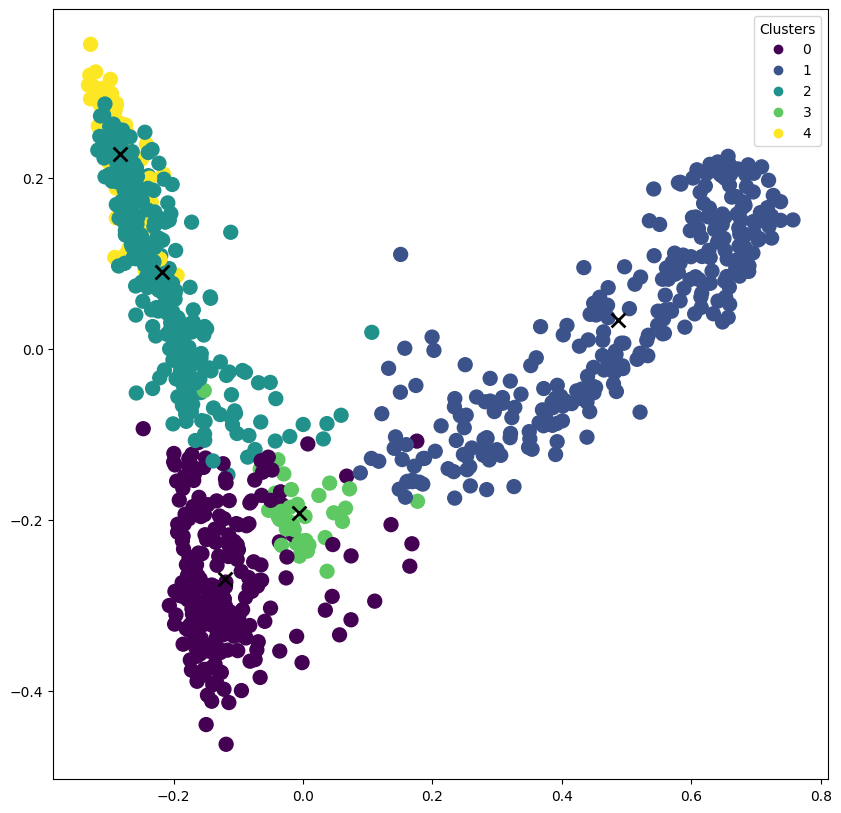

In [38]:
# Génération de plot
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

# Modèle word2vec